<b><u>Data Description</u>:</b>  The data is related with direct marketing campaigns of a 
Portuguese banking institution. The marketing campaigns 
were based on phone calls. Often, more than one contact to 
the same client was required, in order to access if the product 
(bank term deposit) would be ('yes') or not ('no') subscribed. 

<b><u>Domain</u>:</b>  Banking 

<b><u>Context</u>:</b> Leveraging customer information is paramount for most 
businesses. In the case of a bank, attributes of customers like 
the ones mentioned below can be crucial in strategizing a 
marketing campaign when launching a new product.  

<b><u>Objective</u>:</b>  The classification goal is to predict if the client will subscribe 
(yes/no) a term deposit (variable y). 

<b>Attribute Information :</b>

Input variables
##### bank client data:
1.  age (numeric)
2.  job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means 
4. education : (categorical: 'primary', 'secondary', 'tertiary', 'unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. balance : average yearly balance, in euros (numeric) 
8. loan: has personal loan? (categorical: 'no','yes','unknown')

##### Related with the last contact of the current campaign:

9. contact: contact communication type (categorical: 'cellular','telephone', 'unknown') 
10. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. day:  last contact day of the month (numeric 1 -31)
12. duration: last contact duration, in seconds (numeric). 

#####  Other attributes:

13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','other', 'unknown', 'success')

##### Output variable (desired target):

17. target - has the client subscribed a term deposit? (binary: 'yes','no')

### Import the necessary libraries :

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


<b>Comment :</b> Here I have used numpy, pandas, matplotlib, seaborn, scipy for EDA and Data Visualization. Also used sklearn for data spliting, model building and for confusion matrix. 

## ::--------------------------- Exploratory Data Analysis -------------------------------- ::

### Read the data as a dataframe :- 

In [48]:
df  = pd.read_csv(r'D:\Swapnil Dixit\Data Science\Data Trained\Internship -Fliprobo\Projects\Third Phase Project\bankfull.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<b>Comment:</b> Here I have read the Bank-Full  dataset using read_csv() function of pandas. df is a dataframe. I have used head() funtion to display first 5 records of the dataset.

### Perform basic EDA which should include the following and print out your insights at every step:

####  Shape of the data :- 

In [49]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 45211
Total Number of columns : 17


<b>Comment:</b> Shape of the dataframe is (45211, 17).
There are 45211 rows and 17 columns in the dataset. Out of 17 columns 16 is our independent variables and 1(Target) is our dependent variable.

#### Data type of each attribute :-

In [50]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

<b>Comment:</b> By displaying the datatypes of each variable we can see the following:

   -  int type           :  age, balance, day, duration, campaign, pdays, previous
   -  object type(string):  job, marital, education, default, housing, loan, contact, month, poutcome, Target
   -   As we can see the datatypes several of variables are string object. So, we will be changing it to appropriate datatype in data cleaning part.



In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Many columns are of type object i.e. strings. These need to be converted to ordinal type.

In [52]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


<b>Comment :</b> We can see above all the object tpye is converted to category  type.

In [54]:
print(df.job.value_counts())
print('\n',df.marital.value_counts())
print('\n',df.education.value_counts())
print('\n',df.default.value_counts())
print('\n',df.housing.value_counts())
print('\n',df.loan.value_counts())
print('\n',df.contact.value_counts())
print('\n',df.month.value_counts())
print('\n',df.poutcome.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

 no     44396
yes      815
Name: default, dtype: int64

 yes    25130
no     20081
Name: housing, dtype: int64

 no     37967
yes     7244
Name: loan, dtype: int64

 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

 may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

 unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome

<b>Comment : </b> In below code I have created a dictionary and encoded the categorical variable with some numbers.

In [55]:

replaceStruct = {
                "job" :      {"unknown": -1, "blue-collar": 1, "management":2 , "technician": 3, "admin.": 4,"services": 5, 
                         "retired": 6, "self-employed": 7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10,
                         "student": 11},
                "marital":   {"single": 1, "married": 2 ,"divorced": 3},
                "education": {"unknown":-1, "primary": 1, "secondary": 2 ,"tertiary": 3},
                "default":   {"no": 0, "yes": 1},
                "housing":   {"no": 0, "yes": 1},
                "loan":      {"no": 0, "yes": 1},
                "contact":   {"unknown": -1 , "cellular": 1, "telephone": 2},
                "month":     {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                "poutcome":  {"unknown": -1, "failure": 0, "success": 1, "other": 2},
                "Target":    {"no": 0, "yes": 1} 
                    }

df=df.replace(replaceStruct)
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,2,3,0,2143,1,0,-1,5,5,261,1,-1,0,-1,0
1,44,3,1,2,0,29,1,0,-1,5,5,151,1,-1,0,-1,0
2,33,8,2,2,0,2,1,1,-1,5,5,76,1,-1,0,-1,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  Target     45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


<b>Comment: </b>Above we can see all the columns are converted to integer type.

In [57]:
df.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

<b>Comment:</b> Here total missing values count from each column is 0 and we can see there is no missing value in the dataframe.


 But there are some <b>'unknown'</b> values in the dataset with which we will deal after visualization.

In [58]:
df.isnull().values.any()

False

<b>Comment:</b> This returns true if we have any missing values at all. False : No missing value, True: Missing value 

In [59]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

<b>Comment : </b> The above output shows that there is no “null” value in our dataset.


Let’s try to test whether any attribute contains a “?” in it or not. At times there <b>exists “?” or ” ” in place of 
missing values</b>. Using the below code snippet we are going to test whether our dataframe consists of categorical variables 
with values as “?”.

In [60]:
for value in df.columns:
     print(value,":", sum(df[value] == '?'))

age : 0
job : 0
marital : 0
education : 0
default : 0
balance : 0
housing : 0
loan : 0
contact : 0
day : 0
month : 0
duration : 0
campaign : 0
pdays : 0
previous : 0
poutcome : 0
Target : 0


<b>Comment :</b> From above we can see that there is no columns with <b>'?'</b> values in our dataset.

###  Descriptive Statistics :-

In [61]:
df_transpose = df.describe().T
df_transpose

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,3.618212,2.610178,-1.0,2.0,3.0,5.0,11.0
marital,45211.0,1.832275,0.608230,1.0,1.0,2.0,2.0,3.0
education,45211.0,2.019442,0.902795,-1.0,2.0,2.0,3.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.488310,0.976936,-1.0,-1.0,1.0,1.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


<b>Observations : </b> By describing the data we can see that the mean and median of age is very close to each other. The standard deviation of <b>balance, duration and pdays</b> is greater than one third of the mean,  distrubution would be spreaded out around the mean, we will see this in visualisation section.

### Five point summary of  numerical attributes  :-

In [62]:
df_transpose[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
age,18.0,33.0,39.0,48.0,95.0
job,-1.0,2.0,3.0,5.0,11.0
marital,1.0,1.0,2.0,2.0,3.0
education,-1.0,2.0,2.0,3.0,3.0
default,0.0,0.0,0.0,0.0,1.0
balance,-8019.0,72.0,448.0,1428.0,102127.0
housing,0.0,0.0,1.0,1.0,1.0
loan,0.0,0.0,0.0,0.0,1.0
contact,-1.0,-1.0,1.0,1.0,2.0
day,1.0,8.0,16.0,21.0,31.0


### Checking the presence of outliers :-

<AxesSubplot:>

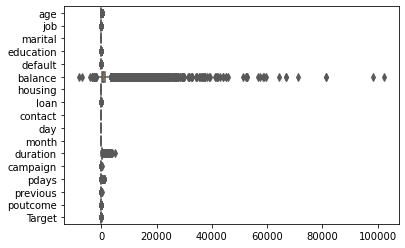

In [63]:
sns.boxplot(data=df, orient="h", palette="Set2", dodge=False)

<AxesSubplot:>

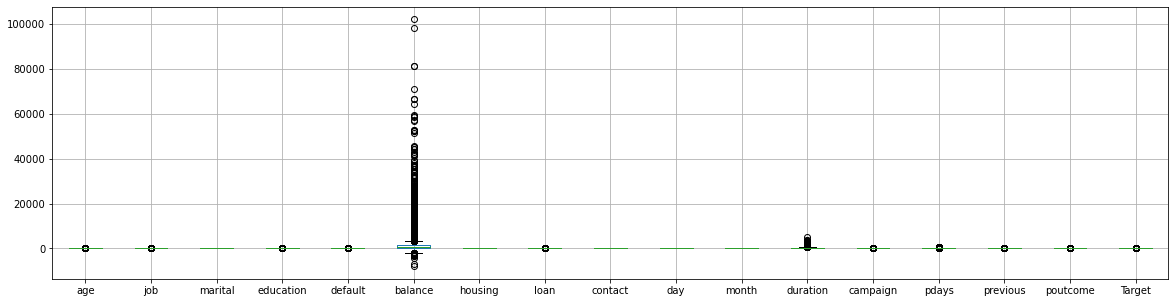

In [64]:
df.boxplot(return_type='axes', figsize=(20,5))

<b>Insight :</b> From above boxplot we can see there are outliers present  in the dataset. By above plot we can clearly see that the age, balance, duration, campaign, pdays, and previous columns have outliers. We will also find the outliers using IQR. Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.

In [65]:
Q1 =  df['balance'].quantile(0.25) # 1º Quartile
Q3 =  df['balance'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range
print('Interquartile range = ', IQR)
print('Numerber of outliers in balance column below the lower whisker :', df[df['balance'] < (Q1-(1.5*IQR))]['balance'].count())
print('Numerber of outliers above balance column the uper whisker  :', df[df['balance'] > (Q3+(1.5*IQR))]['balance'].count())

Interquartile range =  1356.0
Numerber of outliers in balance column below the lower whisker : 17
Numerber of outliers above balance column the uper whisker  : 4712


In [66]:
for i in df.describe().columns:
    Q1 = df.describe().at['25%', i]
    Q3 = df.describe().at['75%', i]
    IQR = Q3-Q1
    LTV = Q1 - 1.5 * IQR # lower bound 
    UTV = Q3 + 1.5 * IQR # upper bound
    print('Column Name                                         :', i)
    print('Interquartile range IQR                             :', IQR)
    print('Numerber of outliers below the lower whisker        :', df[df[i] < LTV][i].count())
    print('Numerber of outliers above the upper whisker         :', df[df[i] > UTV][i].count())
    print('Total Numbers of Ourliers                           :', (df[df[i] < LTV][i].count()) + (df[df[i] > UTV][i].count()))
    
    print('\n')

Column Name                                         : age
Interquartile range IQR                             : 15.0
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 487
Total Numbers of Ourliers                           : 487


Column Name                                         : job
Interquartile range IQR                             : 3.0
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 2178
Total Numbers of Ourliers                           : 2178


Column Name                                         : marital
Interquartile range IQR                             : 1.0
Numerber of outliers below the lower whisker        : 0
Numerber of outliers above the upper whisker         : 0
Total Numbers of Ourliers                           : 0


Column Name                                         : education
Interquartile range IQR                             : 1.0
Nu

## ::-------------------------------- Data Visualization ----------------------------------::

###  Pair plot that includes all the columns of the data frame :-

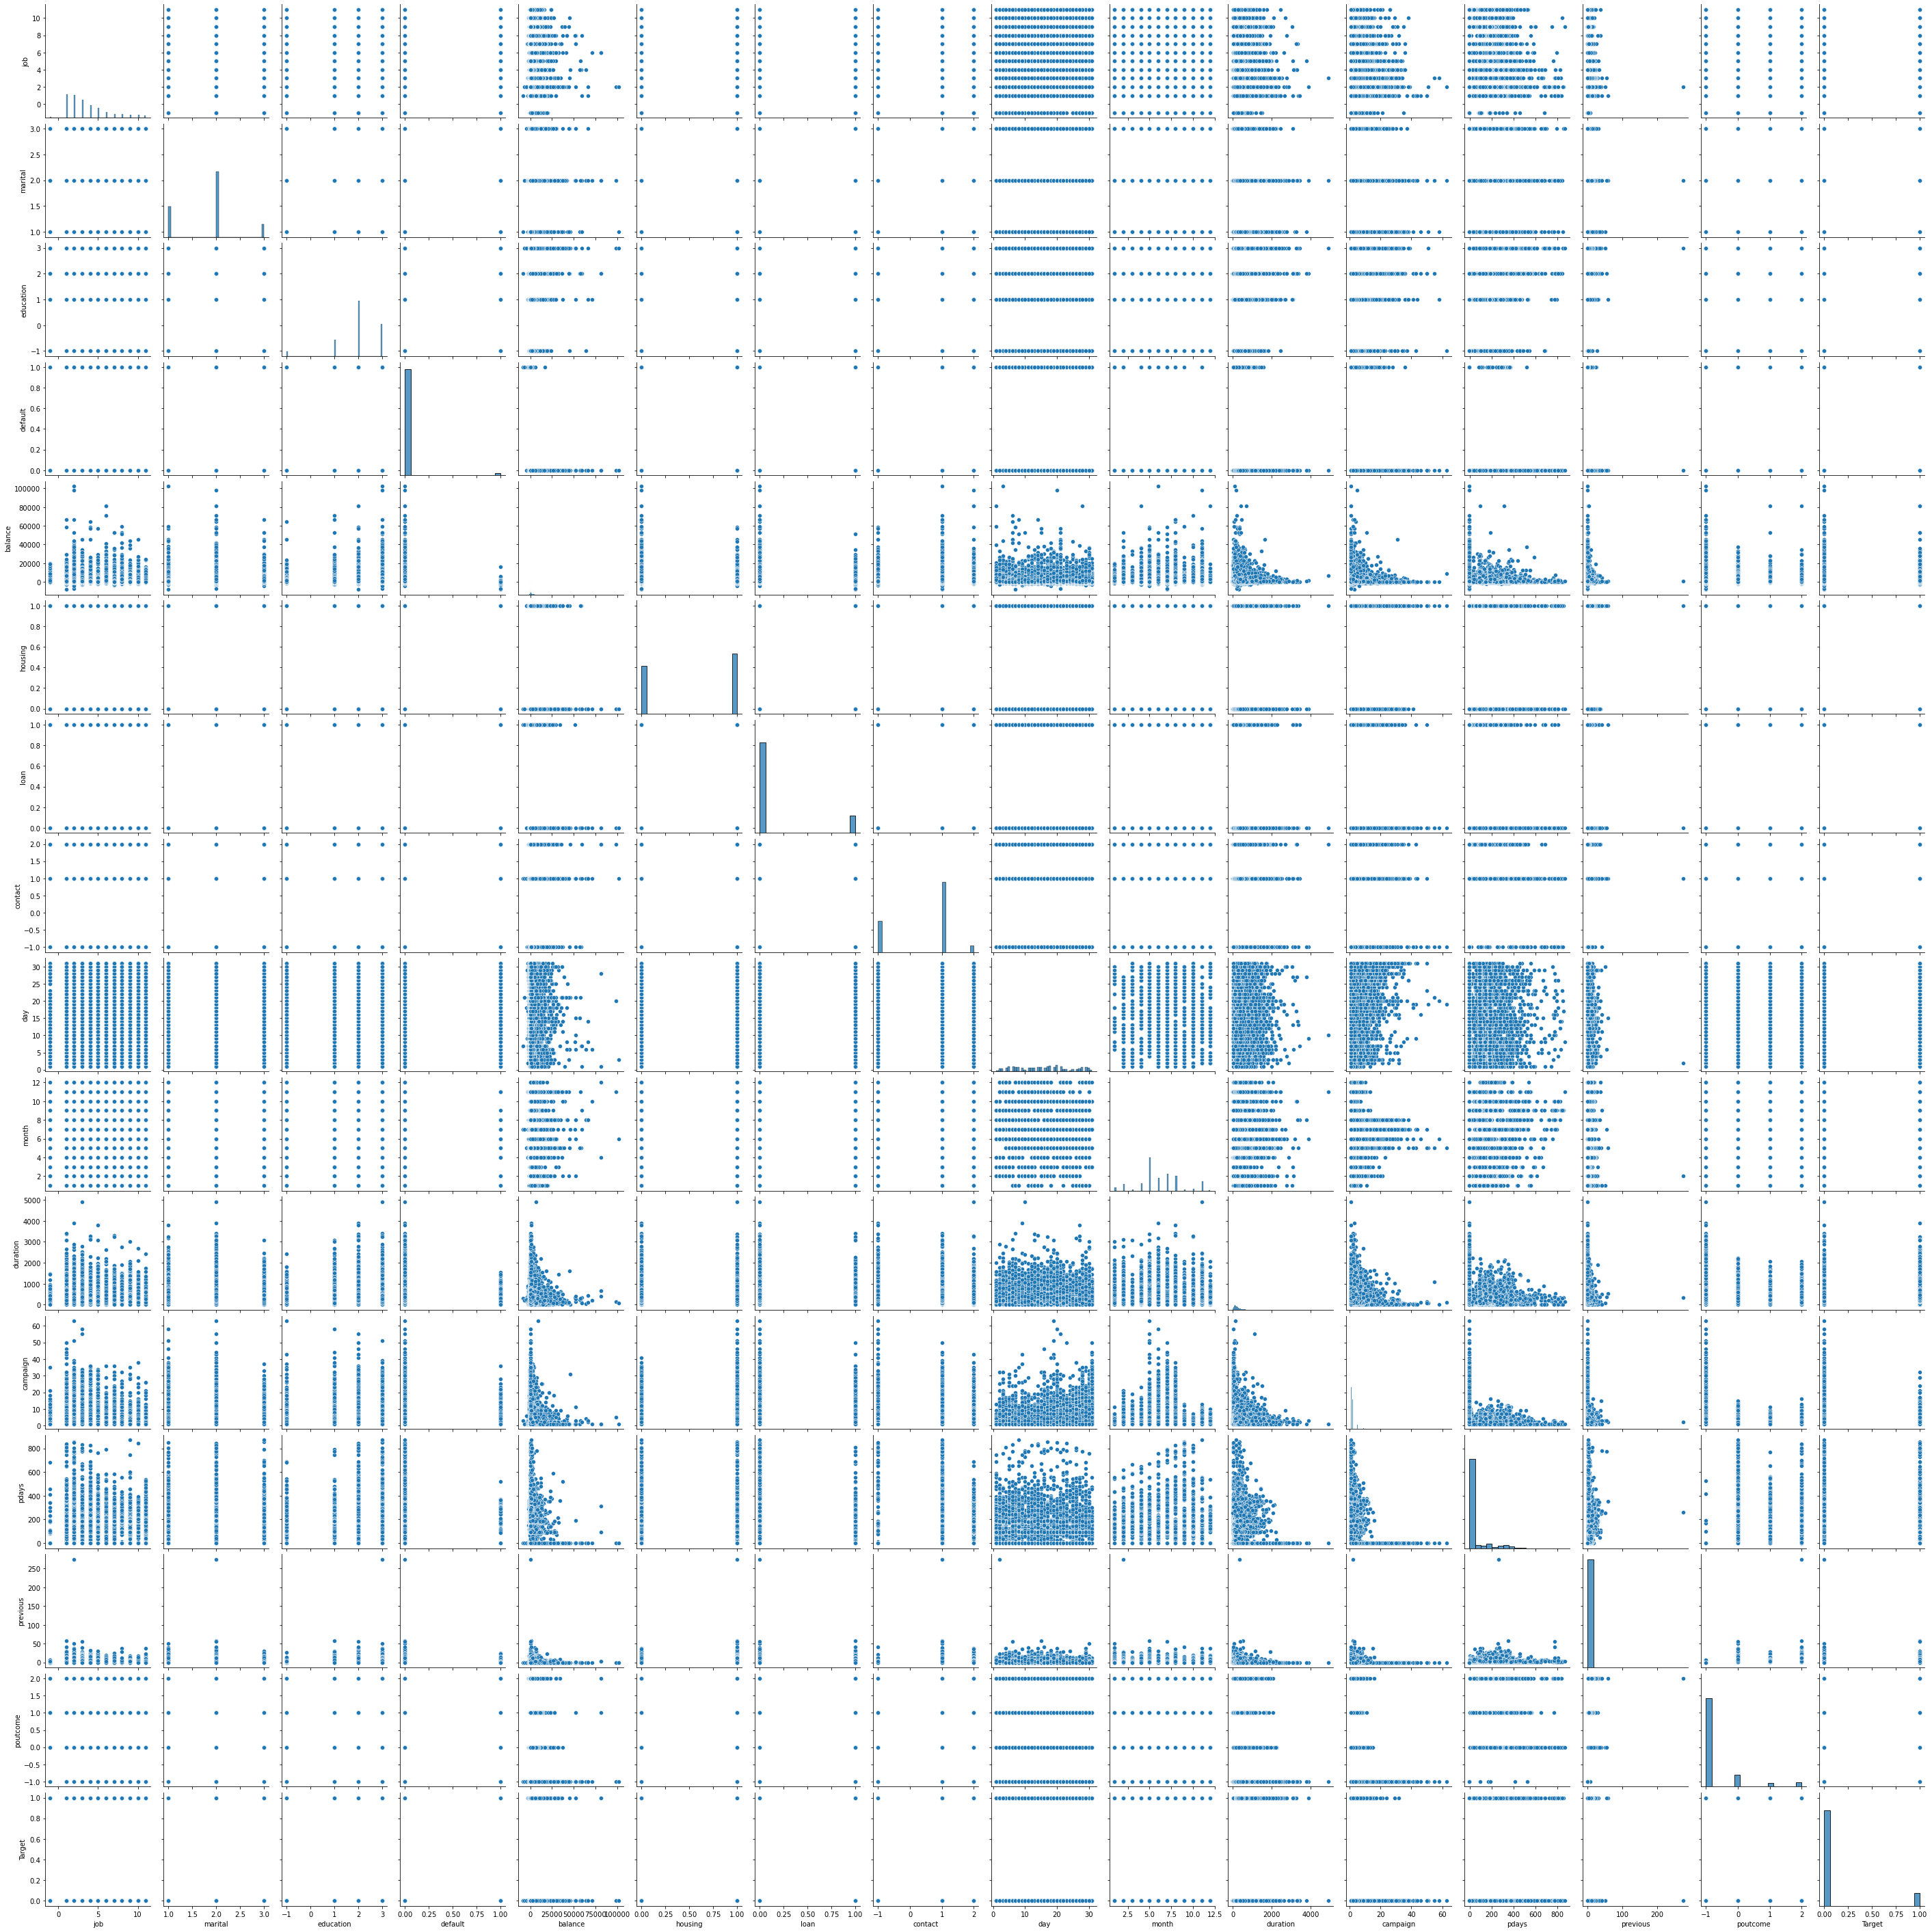

In [67]:
sns.pairplot(df.iloc[:,1:])

<b>Observation : </b> From the above pair plot we can infer the association among the attributes and target column as follows:
- 'Age' column is slightly right skewed. Most of the client age is between 25 to 65 years. 
- 'Job' Here the number of clients who have 'blue-collar','management' and 'technician' are more in ou dataset and it is skewed towards right.
- 'marital' from above we can see that married clients are more tend to subscribe for the term deposite.
- 'Education' clients with higher education are more and also there are many clients whose education level is unknown.
- 'Balance' there is a long tail towards right side in balance column which would be the outliers. 
- 'Housing' clients who dont have housing loan are more tend to subscrive for the term deposite..
- 'Duration' the skewed in the duration indicates that most of the calls are relatively short aslo large number of outliers presense in the dataset.
- 'Campaign' most of the clients have been contacted by the bank between 1 to 5 times. There are some clients who have been contacted by the bank more than 20 times and also we can see that their probability towards the term deposite is very low or alomost 0.  Higher subscriber rate when calls < 5.

### Checking the ratio of subscribers and non-subscribers in the given dataset :-

In [68]:
subscriber_counts = pd.DataFrame(df["Target"].value_counts()).reset_index()
subscriber_counts.columns =["Labels","Target"]
subscriber_counts

,Labels,Target
0,0,39922
1,1,5289


<b>Comment:</b> Out of 45211 data points, 39922 are labeled as 'no' and 5289 as 'yes'. Percentage of clients who did not subscribe is significantlly greater than clients who subscribed. I have also shown the percentage using in pie chart below.


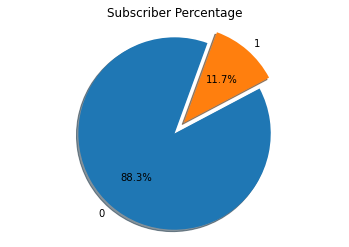

In [69]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(subscriber_counts["Target"], explode=explode, labels=subscriber_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Subscriber Percentage")
plt.show()

<b>Important :</b> From the above we can see that the data is having a huge bias('no%': 88.3%, 'yes%':11.7%) towards the category of clients not subscribing a term deposite. Hence we can build an opinion that our model will tends to perform better towards predicting which clients will not subscrive a term deposite. 

### Influence of important features on Target variable. From the above pair plot we can see some features which has relationship with the target column:-

### Age Distrubution :-

C:\Users\Shivangi S. Dixit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shivangi S. Dixit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


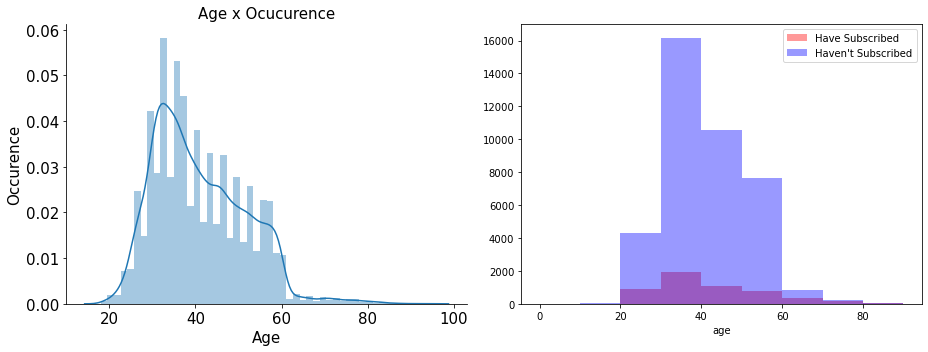

In [70]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

sns.distplot(df['age'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Occurence', fontsize=15)
ax1.set_title('Age x Ocucurence', fontsize=15)
ax1.tick_params(labelsize=15)

#Age group
bins = range(0, 100, 10)
ax2 = sns.distplot(df.age[df.Target==1], color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.age[df.Target==0], ax=ax2,  
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

<b>Insight :</b> From the above we can see that the clients called by the bank have an extensive age range, from 18 to 95 years old. However, a majority of customers called is in the range of 30s to 40s. The distribution of age is fairly normal with smaller standard deviation. Subscribtion rate is also more in range of 30 to 40 years old. 

### Job Distribution :-

C:\Users\Shivangi S. Dixit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


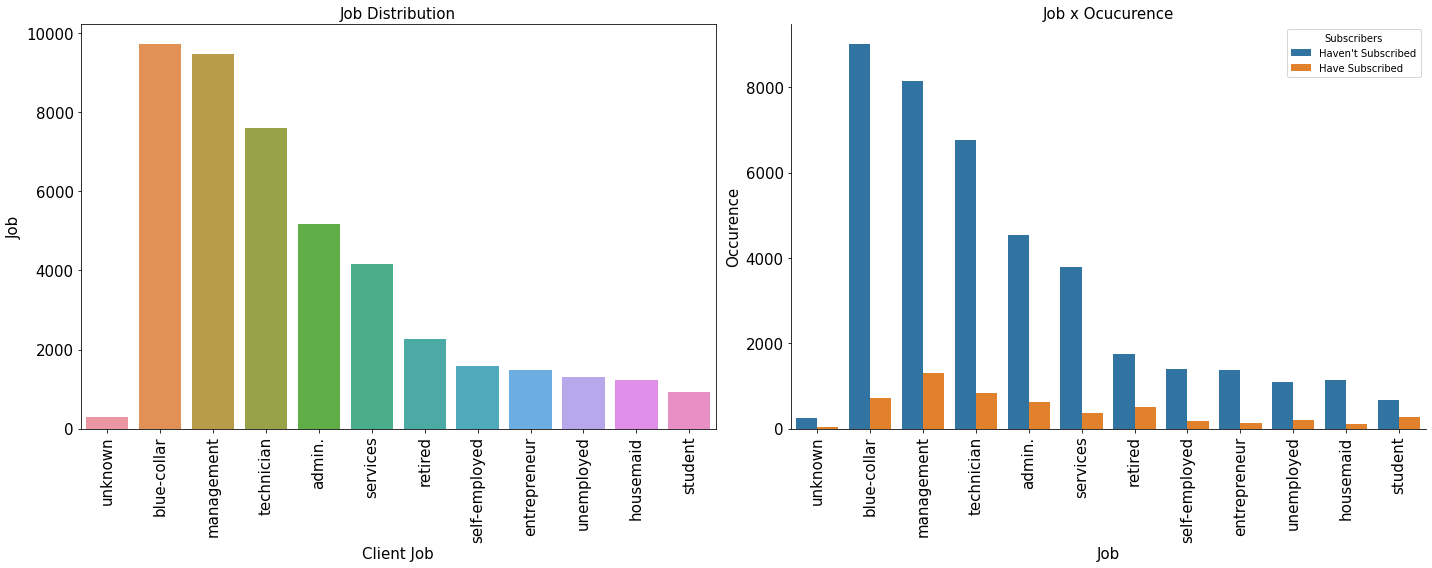

In [71]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20, 8)

sns.countplot(x = 'job', data = df, ax = ax1, )
ax1.set_xlabel('Client Job', fontsize=15)
ax1.set_ylabel('Job', fontsize=15)
ax1.set_title('Job Distribution', fontsize=15)
ax1.tick_params(labelsize=15)
ax1.set_xticklabels(replaceStruct['job'], rotation=90)

sns.countplot(df['job'], data = df, hue = 'Target', ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Job', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Job x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(replaceStruct['job'], rotation=90)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

<b>Insight : </b> From above chart we can see that highest count of 'blue-color' job clients in the underline dataset. Managemnet and technician client's clount are also very high incomparision to other job holders. There are very less students. <b>Important :</b> The subscription rate(ratio) is hight for students and retired clients.

### Marital Distribution :-

C:\Users\Shivangi S. Dixit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


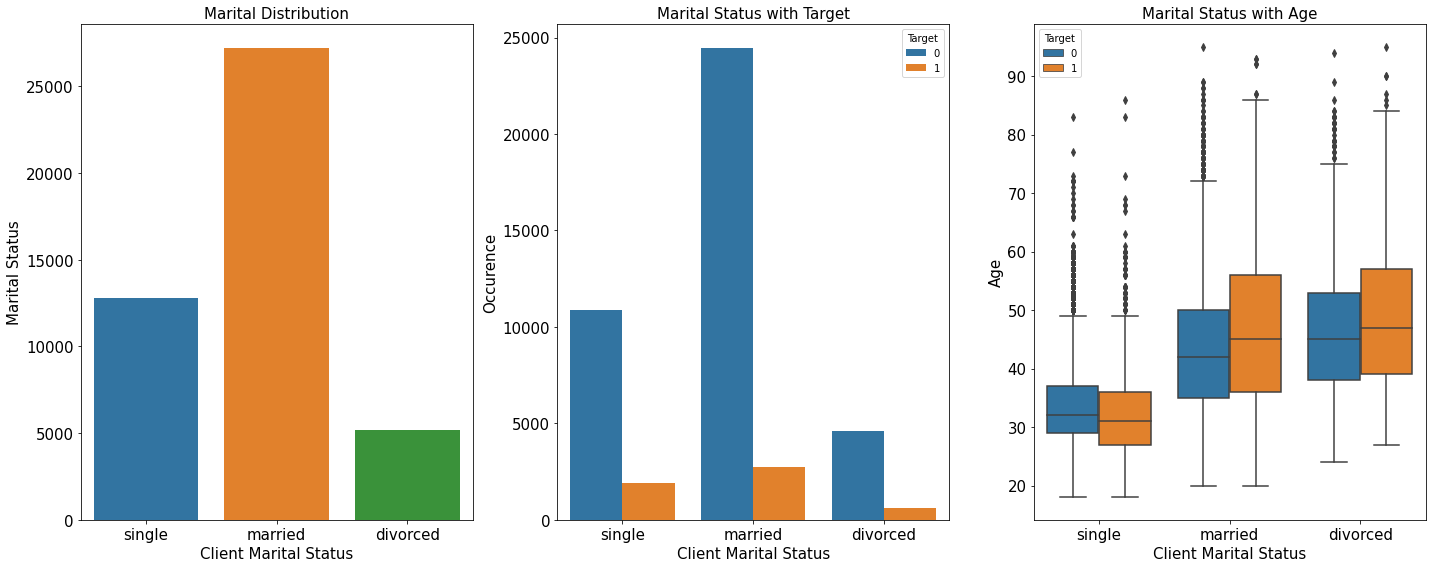

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 4))
fig.set_size_inches(20, 8)

sns.countplot(x = 'marital', data = df, ax = ax1)
ax1.set_xlabel('Client Marital Status', fontsize=15)
ax1.set_ylabel('Marital Status', fontsize=15)
ax1.set_title('Marital Distribution', fontsize=15)
ax1.set_xticklabels(replaceStruct['marital'])
ax1.tick_params(labelsize=15)

sns.countplot(df['marital'], data = df, hue = 'Target', ax = ax2)
ax2.set_xlabel('Client Marital Status', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Marital Status with Target', fontsize=15)
ax2.set_xticklabels(replaceStruct['marital'])
ax2.tick_params(labelsize=15)

sns.boxplot(x="marital", y='age', hue="Target", data=df, ax=ax3)
ax3.set_xlabel('Client Marital Status', fontsize=15)
ax3.set_ylabel('Age', fontsize=15)
ax3.set_title('Marital Status with Age', fontsize=15)
ax3.set_xticklabels(replaceStruct['marital'])
ax3.tick_params(labelsize=15)

ax3.set_xticklabels(replaceStruct['marital'])
plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

<b>Insight : </b> The count of married clients are very high in our dataset. Here the ratio of subscription towards term deposite is good with the clients who are single.

### Education Distribution :-

C:\Users\Shivangi S. Dixit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


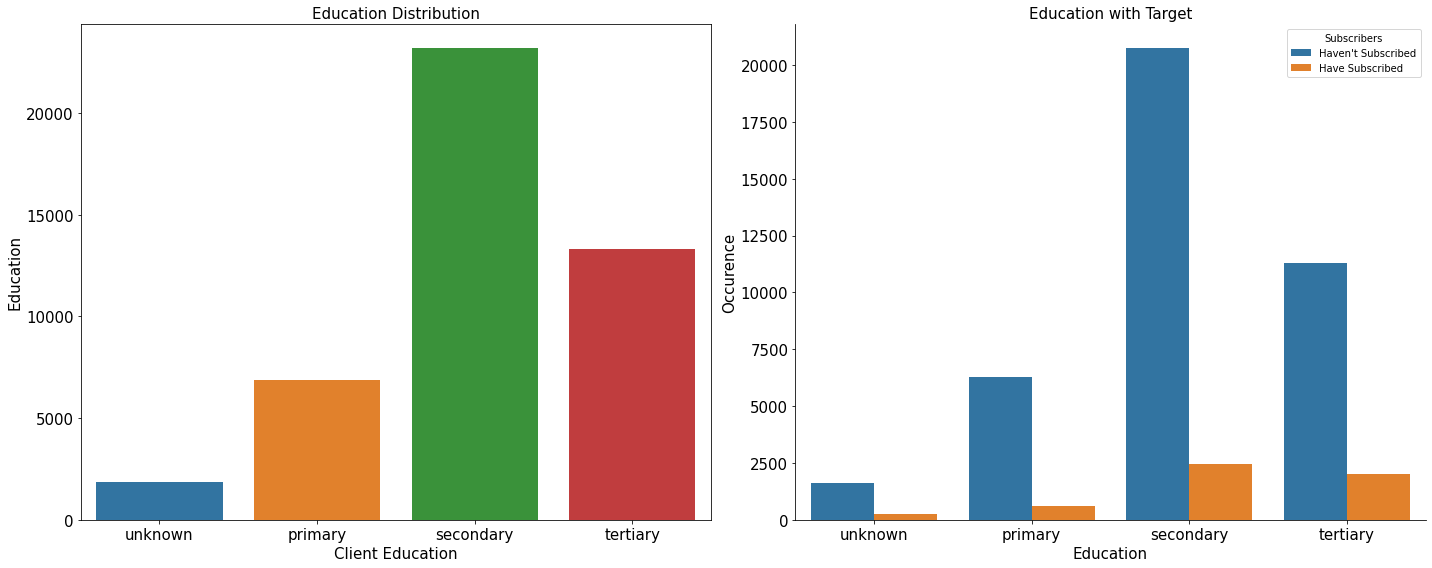

In [73]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20, 8)

sns.countplot(x = 'education', data = df, ax = ax1)
ax1.set_xlabel('Client Education', fontsize=15)
ax1.set_ylabel('Education', fontsize=15)
ax1.set_title('Education Distribution', fontsize=15)
ax1.set_xticklabels(replaceStruct['education'])
ax1.tick_params(labelsize=15)


sns.countplot(df['education'], data = df, hue = 'Target', ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Education', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Education with Target', fontsize=15)
ax2.set_xticklabels(replaceStruct['education'])
ax2.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

<b>Insight :</b> Clients count with 'secondary' level of education is very high incomperision of other education level. Also clients who have education level 'secondary' and 'tertiary' are more likely to subscribe for the term deposite.

### Balance Distribution :-

C:\Users\Shivangi S. Dixit\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Shivangi S. Dixit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shivangi S. Dixit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shivangi S. Dixit\anaconda3\lib\site-packages\seabor

Text(0.5, 1.0, 'balance Distribution')

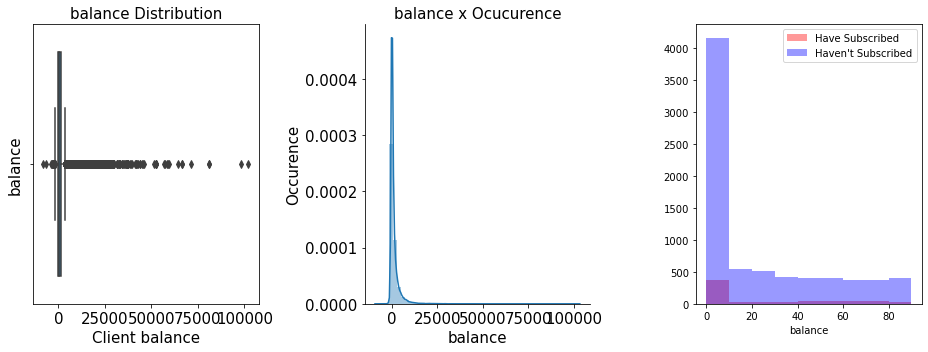

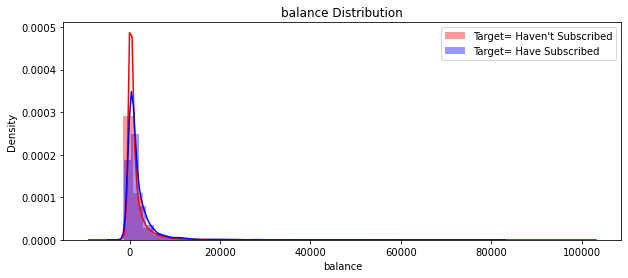

In [74]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
sns.boxplot(x = 'balance', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('Client balance', fontsize=15)
ax1.set_ylabel('balance', fontsize=15)
ax1.set_title('balance Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['balance'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('balance', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('balance x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

bins = range(0, 100, 10)
ax3 = sns.distplot(df.balance[df.Target==1], color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.balance[df.Target==0], ax=ax3, color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

plt.figure(figsize=(10,4))
sns.distplot(df[df["Target"] == 0]['balance'], color = 'r',label="Target= Haven't Subscribed")
sns.distplot(df[df["Target"] == 1]['balance'], color = 'b',label='Target= Have Subscribed')
plt.legend()
plt.title("balance Distribution")

<b>Insight :</b> From the above graph we can see that there is a long tail towards right side in balance column which would be the outliers. The number of subscriber are for the clients whose yearly balance is between 1 to 10k euros.

### DEFAULT, HOUSING, LOAN Distribution :-

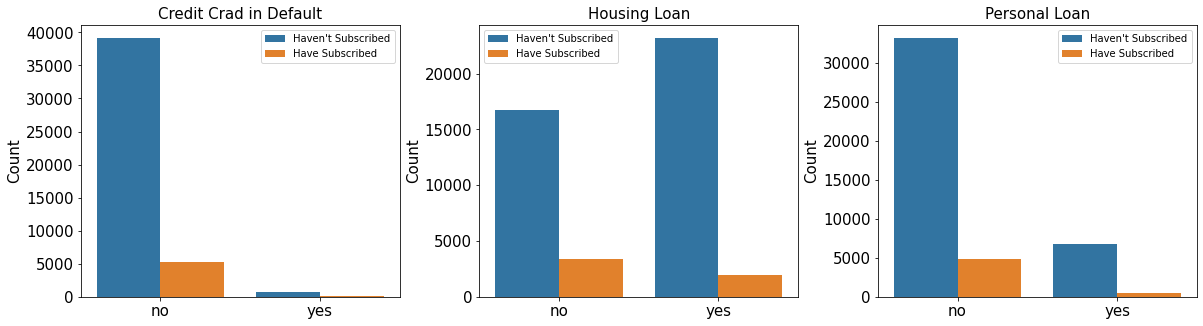

In [75]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
sns.countplot(x = 'default', data = df, hue='Target', ax = ax1)
ax1.set_title('Credit Crad in Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)
ax1.set_xticklabels(replaceStruct['default'])
ax1.legend(["Haven't Subscribed", "Have Subscribed"])
# Housing, has housing loan ?
sns.countplot(x = 'housing', data = df,  hue='Target', ax = ax2)
ax2.set_title('Housing Loan', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(replaceStruct['housing'])
ax2.legend(["Haven't Subscribed", "Have Subscribed"])

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = df,  hue='Target', ax = ax3)
ax3.set_title('Personal Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)
ax3.set_xticklabels(replaceStruct['loan'])
ax3.legend(["Haven't Subscribed", "Have Subscribed"])

plt.subplots_adjust(wspace=0.25)


<b>Observations:</b>

   -  Most of the clients do not have credit card in default and the number of subscribers is also high for the clients who dont have credit card.
   -  Most of the clients have housing loan and the clients who dont have housing loan are more likely to subscribe for the term deposite.
   -  Most of the clients do not have personal loan and also the ratio of subscribers who took personal loan and did not take personal loan is almost same.

### Contact Distribution :-

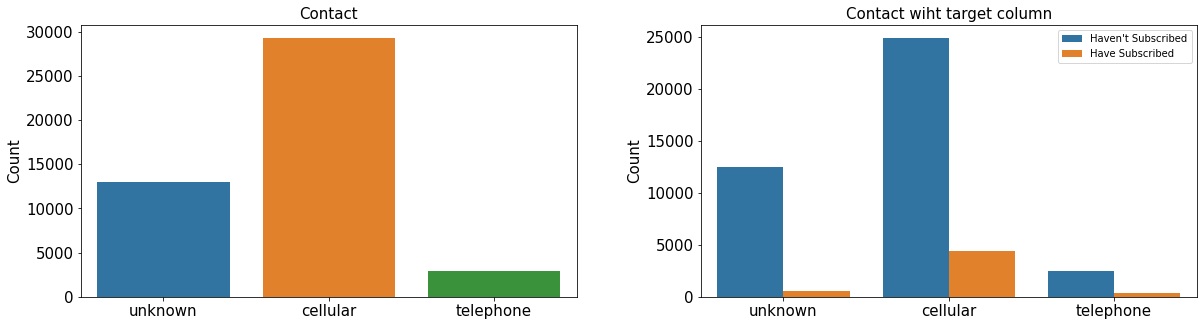

In [76]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.countplot(x = 'contact', data = df,  ax = ax1)
ax1.set_title('Contact', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.set_xticklabels(replaceStruct['contact'])
ax1.tick_params(labelsize=15)

sns.countplot(x = 'contact', data = df, hue='Target', ax = ax2)
ax2.set_title('Contact wiht target column', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.set_xticklabels(replaceStruct['contact'])
ax2.legend(["Haven't Subscribed", "Have Subscribed"])
plt.subplots_adjust(wspace=0.25)


<b>Observation :</b> From the above we can see that most of the clients have been called by cellular phone. 
    Also according to my knowledge contact communication type will not play  a significant role in the model building because there would no meaningful relation between contact type and bank.I will be dropping 'Contact ' building model

### Months  Distribution:-

C:\Users\Shivangi S. Dixit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


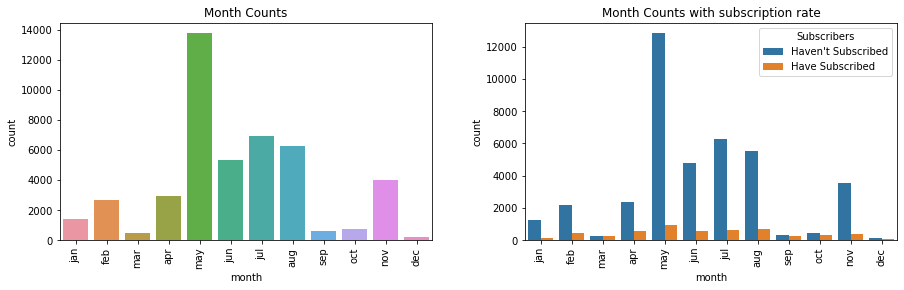

In [77]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4))

sns.countplot(df['month'],ax = ax1)
ax1.set_xticklabels(replaceStruct['month'], rotation=90)
ax1.set_title('Month Counts')


sns.countplot(x = 'month', data=df, hue='Target',ax = ax2)
ax2.set_xticklabels(replaceStruct['month'], rotation=90)
ax2.set_title('Month Counts with subscription rate')

plt.subplots_adjust(wspace=0.25)
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

<b>Observation : </b> The bank contacted most clients between May and July. The highest contact rate is around 30%, which happened in May, while the contact rate is very less in March, September, October, and December.
The highest subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, and December are over 30% to 40%.

C:\Users\Shivangi S. Dixit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


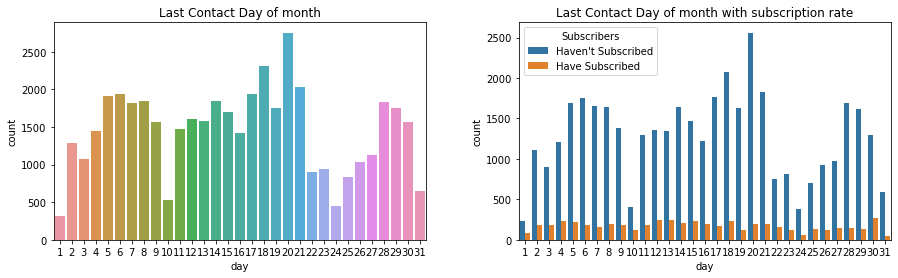

In [78]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4))

sns.countplot(df['day'],ax = ax1)
ax1.set_title('Last Contact Day of month')


sns.countplot(x = 'day', data=df, hue='Target',ax = ax2)
ax2.set_title('Last Contact Day of month with subscription rate')

plt.subplots_adjust(wspace=0.25)
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

<b>Observation : </b> From the above graph we can see that number of contacts made is almost same for all the days but still 20th day has more data poits.

### Duration Distribution :-

C:\Users\Shivangi S. Dixit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0, 'no'), Text(1, 0, 'yes')]

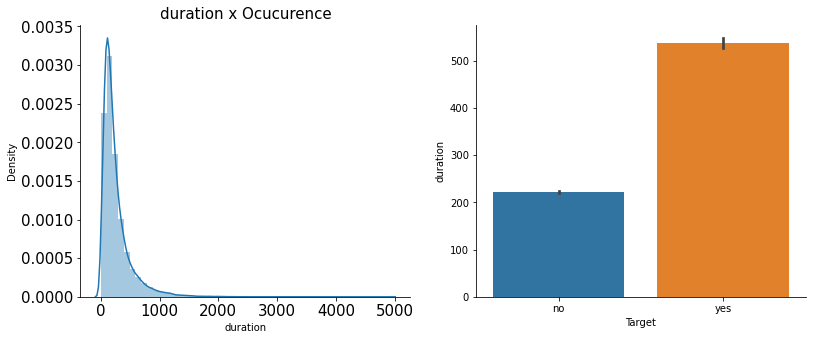

In [79]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.distplot(df['duration'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_title('duration x Ocucurence', fontsize=15)
ax1.tick_params(labelsize=15)

sns.barplot(x="Target", y="duration", data=df, ax = ax2)
sns.despine(ax = ax2)
ax2.set_xticklabels(replaceStruct['Target'])

<b>Observation : </b> From above we can see that the long tail towards right (right skewed) in the duration indicates that most of the calls are relatively short aslo large number of outliers presense in the dataset. If duration is between 5 to 10 minutes then clients are more likely to subscribe for the term deposite.

### Campaign Distrbution:-

C:\Users\Shivangi S. Dixit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0, 'no'), Text(1, 0, 'yes')]

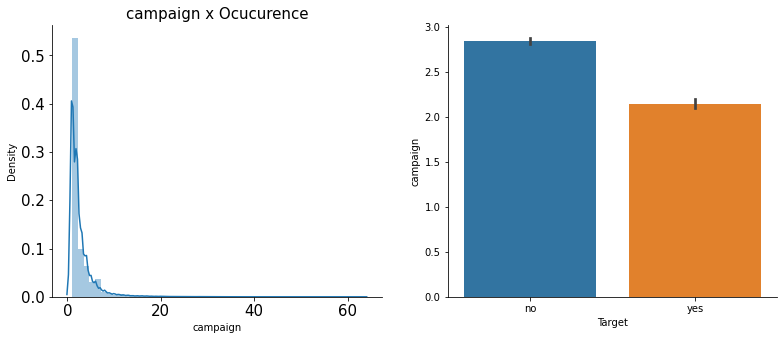

In [80]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.distplot(df['campaign'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_title('campaign x Ocucurence', fontsize=15)
ax1.tick_params(labelsize=15)

sns.barplot(x="Target", y="campaign", data=df, ax = ax2)
sns.despine(ax = ax2)
ax2.set_xticklabels(replaceStruct['Target'])

<b>Observation : </b> About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special needs that require frequent contact.

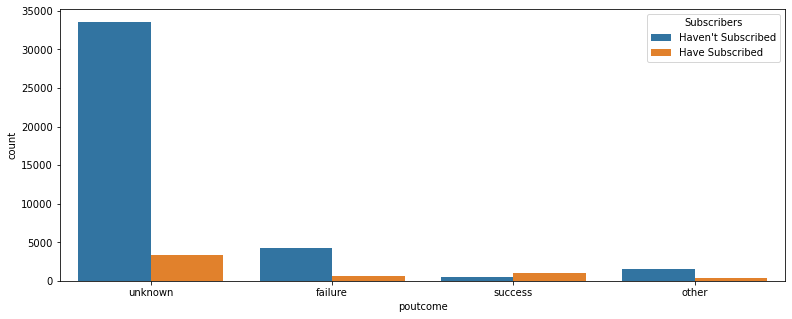

In [81]:
fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 5))
sns.countplot(x = 'poutcome', data=df, hue='Target')
ax.set_xticklabels(replaceStruct['poutcome'])
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

<b>Observation : </b> From the above count plot we can see that the outcome of the previouly marketing campaign is mostly unknown(nonexistent). Failure rate is higher is than the success rate. 

## Correlation using Heatmap :-

<AxesSubplot:title={'center':'Correlation of Attributes'}>

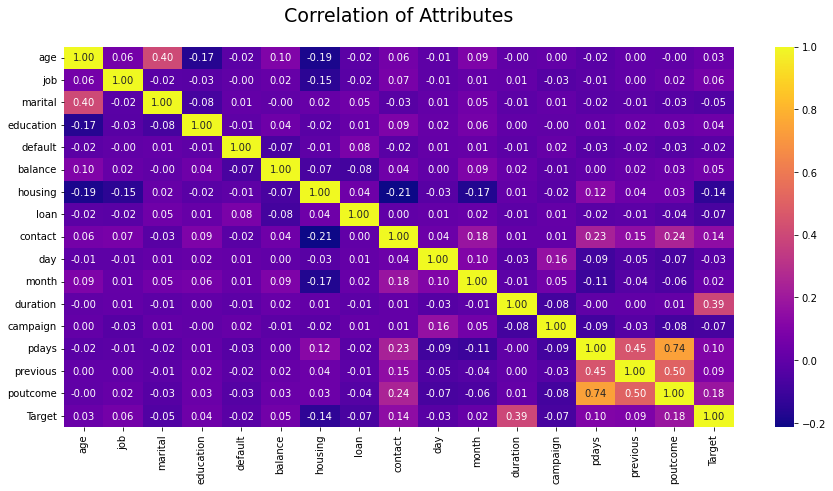

In [82]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

<b>Observation:</b> From the above heatmap we can see that :
- 'Campaign outcome' has a strong correlation with 'duration', 
- A moderate correlation between 'Campaign outcome' and  'previous contacts'.
- Mild correlations between 'balance', 'month of contact' and 'number of campaign'.

## ::----------------------------- Model Building --------------------------------------::

### Dimensionality Reduction : -
- As we have seen above 'Contact' is not relevent for our model building so we will drop it.

### Contact Remove :-

In [83]:
df = df.drop(['contact'], axis=1)

In [84]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,2,3,0,2143,1,0,5,5,261,1,-1,0,-1,0


### Replacement of  unknown with others in poutcome column :-

- Here in poutcome column there are values 'other' and 'unknown' which dont give any significant insight so I will replace 'unknown' with 'others' . As I have already encoded 'poutcome' column, now we just need to replace -1 to 2.

In [85]:
df['poutcome'].head(4)

0   -1
1   -1
2   -1
3   -1
Name: poutcome, dtype: int64

In [86]:
df.loc[df['poutcome'] == -1, 'poutcome'] = 2
df['poutcome'].head(4)

0    2
1    2
2    2
3    2
Name: poutcome, dtype: int64

### Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc.

- I have already converted the data types to appropriate data types in EDA.
- Also I did not find any missing value in the EDA of each coloumn.
- Now we are good to go with model building after generaing the dummy variables.

### Generating Dummy Variables :-

- There are three columns 'job', 'marital', 'poutcome' for which I will be converting to dummy variable.

In [87]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,2,3,0,2143,1,0,5,5,261,1,-1,0,2,0


In [88]:
oneHotCols=["job", "marital", "poutcome"]
df=pd.get_dummies(df, columns=oneHotCols)

In [89]:
df.head(1)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_8,job_9,job_10,job_11,marital_1,marital_2,marital_3,poutcome_0,poutcome_1,poutcome_2
0,58,3,0,2143,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1


In [90]:
df.shape

(45211, 31)

In [91]:
df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'Target',
       'job_-1', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'job_9', 'job_10', 'job_11', 'marital_1', 'marital_2',
       'marital_3', 'poutcome_0', 'poutcome_1', 'poutcome_2'],
      dtype='object')

<b>Comment: </b> After generating dummy variables we can see above the shape of the dataframe is (45211, 31), now total number of varaibles are 31

## Spliting the data into training and test set in the ratio of 70:30 respectively :-

In [92]:
X = df.drop('Target', axis=1)
y = df[['Target']]
df.head(1)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_8,job_9,job_10,job_11,marital_1,marital_2,marital_3,poutcome_0,poutcome_1,poutcome_2
0,58,3,0,2143,1,0,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1


In [93]:
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
print('x train data {}'.format(x_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (31647, 30)
y train data (31647, 1)
x test data  (13564, 30)
y test data  (13564, 1)


### Scalling :-

- Here I scalling our x traine and x test data and assigning to X_train and X_test

In [94]:
X_train_scaled = preprocessing.scale(x_train)
X_test_scaled = preprocessing.scale(X_test)

X_train = X_train_scaled
X_test  = X_test_scaled

## ---------------------------Comparing Base Models---------------------------------- :

- I am using 'LogisticRegression', ' KNeighborsClassifier', 'DecisionTreeClassifier', 'GaussianNB' and 'SVC(Support Vector Machine)' base classification algorithms and will be comparaing their results with 'Accuracy', 'Precision', 'Recall', 'F1 Score' and confusion matrix.
- I will also evaluate our model using k-fold cross validation technique

In [95]:
# prepare cross validation
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

## Logistic Regression :-

In [ ]:
LogReg = LogisticRegression(solver = 'lbfgs')
LogReg.fit(X_train, y_train.values.ravel())

# Predicting for test set
LogReg_y_pred               = LogReg.predict(X_test)
LogReg_Score                = LogReg.score(X_test, y_test)

LogReg_ScoreAccuracy        = accuracy_score(y_test, LogReg_y_pred)

LogReg_PrecisonScore        = precision_score(y_test, LogReg_y_pred)
LogReg_RecollScore          = recall_score(y_test, LogReg_y_pred)
LogReg_F1                   = f1_score(y_test, LogReg_y_pred)

cross_validation_result = model_selection.cross_val_score(LogReg, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

base_model_results = pd.DataFrame([['Logistic Regression', LogReg_ScoreAccuracy, LogReg_PrecisonScore,
                                LogReg_RecollScore, LogReg_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])

print('\nLogistic Regression classification Report : \n',metrics.classification_report(y_test, LogReg_y_pred))

## K-Nearest Neighbors (K-NN) :-

In [ ]:
Knn = KNeighborsClassifier(n_neighbors=9, weights = 'uniform', metric='euclidean')
Knn.fit(X_train, y_train.values.ravel())

# Predicting for test set
Knn_y_pred               = Knn.predict(X_test)
Knn_Score                = Knn.score(X_test, y_test)

Knn_ScoreAccuracy        = accuracy_score(y_test, Knn_y_pred)
Knn_PrecisonScore        = precision_score(y_test, Knn_y_pred)
Knn_RecollScore          = recall_score(y_test, Knn_y_pred)
Knn_F1                   = f1_score(y_test, Knn_y_pred)

cross_validation_result = model_selection.cross_val_score(Knn, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
knn_models_results = pd.DataFrame([['K-Nearest Neighbors', Knn_ScoreAccuracy, Knn_PrecisonScore,
                                Knn_RecollScore, Knn_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(knn_models_results, ignore_index = True)

print('\nK-Nearest Neighbors (K-NN) classification Report : \n',metrics.classification_report(y_test, Knn_y_pred))

In [ ]:
base_model_results

## SVM (rbf) :-

In [ ]:
Svm = SVC(random_state = 0, kernel = 'rbf', probability= True)
Svm.fit(X_train, y_train.values.ravel())

# Predicting for test set
Svm_y_pred               = Svm.predict(X_test)
Svm_Score                = Svm.score(X_test, y_test)

Svm_ScoreAccuracy        = accuracy_score(y_test, Svm_y_pred)
Svm_PrecisonScore        = precision_score(y_test, Svm_y_pred)
Svm_RecollScore          = recall_score(y_test, Svm_y_pred)
Svm_F1                   = f1_score(y_test, Svm_y_pred)

cross_validation_result = model_selection.cross_val_score(Svm, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
svm_models_results = pd.DataFrame([['SVM (RBF)', Svm_ScoreAccuracy, Svm_PrecisonScore,
                                Svm_RecollScore, Svm_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(svm_models_results, ignore_index = True)
print('\nSVM classification Report : \n',metrics.classification_report(y_test, Svm_y_pred))

In [ ]:
base_model_results

## Naive Bayes :-

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train, y_train.values.ravel())

# Predicting for test set
GNB_y_pred               = GNB.predict(X_test)
GNB_Score                = GNB.score(X_test, y_test)

GNB_ScoreAccuracy        = accuracy_score(y_test, GNB_y_pred)
GNB_PrecisonScore        = precision_score(y_test, GNB_y_pred)
GNB_RecollScore          = recall_score(y_test, GNB_y_pred)
GNB_F1                   = f1_score(y_test, GNB_y_pred)

cross_validation_result = model_selection.cross_val_score(GNB, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

GNB_models_results = pd.DataFrame([['Naive Bayes (Gaussian)', GNB_ScoreAccuracy, GNB_PrecisonScore,
                                GNB_RecollScore, GNB_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(GNB_models_results, ignore_index = True)
print('\nGNB classification Report : \n',metrics.classification_report(y_test, GNB_y_pred))

In [ ]:
base_model_results

## Decision Tree :-

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree.fit(X_train, y_train)

# Predicting for test set
dTree_y_pred               = dTree.predict(X_test)
dTree_Score                = dTree.score(X_test, y_test)

dTree_ScoreAccuracy        = accuracy_score(y_test, dTree_y_pred)
dTree_PrecisonScore        = precision_score(y_test, dTree_y_pred)
dTree_RecollScore          = recall_score(y_test, dTree_y_pred)
dTree_F1                   = f1_score(y_test, dTree_y_pred)

cross_validation_result = model_selection.cross_val_score(dTree, X_train, y_train, cv=kfold, scoring='accuracy')
dTree_models_results = pd.DataFrame([['Decision Tree ', dTree_ScoreAccuracy, dTree_PrecisonScore,
                                dTree_RecollScore, dTree_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(dTree_models_results, ignore_index = True)
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

print('\nDTree classification Report : \n',metrics.classification_report(y_test, dTree_y_pred))

<b>Comment : </b> From above accuracy we can see that there is a high degree of overfitting in the model due to which the test accuracy drops drastically

### Reducing over fitting (Regularization)

<b>Improvement : </b> Here I will Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [ ]:
dTreePR = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
dTreePR.fit(X_train, y_train)
print(dTreePR.score(X_train, y_train))
print(dTreePR.score(X_test, y_test))

In [ ]:
# Predicting for test set
dTreePR_y_pred               = dTreePR.predict(X_test)
dTreePR_Score                = dTreePR.score(X_test, y_test)

dTreePR_ScoreAccuracy        = accuracy_score(y_test, dTreePR_y_pred)
dTreePR_PrecisonScore        = precision_score(y_test, dTreePR_y_pred)
dTreePR_RecollScore          = recall_score(y_test, dTreePR_y_pred)
dTreePR_F1                   = f1_score(y_test, dTreePR_y_pred)

cross_validation_result = model_selection.cross_val_score(dTreePR, X_train, y_train, cv=kfold, scoring='accuracy')
dTreePR_models_results = pd.DataFrame([['Decision Tree (Prune)', dTreePR_ScoreAccuracy, dTreePR_PrecisonScore,
                                dTreePR_RecollScore, dTreePR_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(dTreePR_models_results, ignore_index = True)

print('\nDTree with Prune classification Report : \n',metrics.classification_report(y_test, dTreePR_y_pred))

<b>Comment : </b> Now we can see that accuracy increased after prunning.

### Connfusion matrix of above base models :-

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))

cm=metrics.confusion_matrix(y_test, LogReg_y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True ,fmt='g', ax = axs[0,0])
axs[0,0].set_xlabel('Predicted Labels');
axs[0,0].set_ylabel('Actual Labels'); 
axs[0,0].set_title('Logistic Regression'); 

cm=metrics.confusion_matrix(y_test, Knn_y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True ,fmt='g', ax = axs[0,1])
axs[0,1].set_xlabel('Predicted Labels');
axs[0,1].set_ylabel('Actual Labels'); 
axs[0,1].set_title('K-NN'); 

cm=metrics.confusion_matrix(y_test, Svm_y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True ,fmt='g', ax = axs[0,2])
axs[0,2].set_xlabel('Predicted Labels');
axs[0,2].set_ylabel('Actual Labels'); 
axs[0,2].set_title('SVM(RBF)');

cm=metrics.confusion_matrix(y_test, GNB_y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True ,fmt='g', ax = axs[1,0])
axs[1,0].set_xlabel('Predicted Labels');
axs[1,0].set_ylabel('Actual Labels'); 
axs[1,0].set_title('Naive Bayes (Gaussian)');


cm=metrics.confusion_matrix(y_test, dTree_y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True ,fmt='g', ax = axs[1,1])
axs[1,1].set_xlabel('Predicted Labels');
axs[1,1].set_ylabel('Actual Labels'); 
axs[1,1].set_title('Decision Tree');

cm=metrics.confusion_matrix(y_test, dTreePR_y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True ,fmt='g', ax = axs[1,2])
axs[1,2].set_xlabel('Predicted Labels');
axs[1,2].set_ylabel('Actual Labels'); 
axs[1,2].set_title('Decision Tree(Prune)');


# ROC graph

logistic_fpr, logistic_tpr, logistic_threshold = metrics.roc_curve(y_test, LogReg_y_pred)
logistic_roc_auc = metrics.roc_auc_score(y_test, LogReg_y_pred)
fig1_graph = plt.figure(figsize=(15,10))
fig1_graph.add_subplot(2,3,1)
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Model (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")


knn_fpr, knn_tpr, knn_threshold = metrics.roc_curve(y_test, Knn_y_pred)
knn_roc_auc = metrics.roc_auc_score(y_test, Knn_y_pred)
fig1_graph.add_subplot(2,3,2)
plt.plot(knn_fpr, knn_tpr, label='K-NN Model (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

svm_fpr, svm_tpr, svm_threshold = metrics.roc_curve(y_test,  Svm_y_pred)
svm_roc_auc = metrics.roc_auc_score(y_test,  Svm_y_pred)
fig1_graph.add_subplot(2,3,3)
plt.plot(svm_fpr, svm_tpr, label='SVM Model (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

gnb_fpr, gnb_tpr, gnb_threshold = metrics.roc_curve(y_test,  GNB_y_pred)
gnb_roc_auc = metrics.roc_auc_score(y_test,  GNB_y_pred)
fig1_graph.add_subplot(2,3,4)
plt.plot(gnb_fpr, gnb_tpr, label='GNB Model (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

dTree_fpr, dTree_tpr, dTree_threshold = metrics.roc_curve(y_test,  dTreePR_y_pred)
dTree_roc_auc = metrics.roc_auc_score(y_test,  dTreePR_y_pred)
fig1_graph.add_subplot(2,3,5)
plt.plot(dTree_fpr, dTree_tpr, label='Decision Tree Model (area = %0.2f)' % dTree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

plt.show()

base_model_results

<b>Base Model Comparison  : </b> From the above <b>confusion matrix, ROC curve and Accuracy Table</b> we can see that Decision Tree and Logistic Regression obtained the highest accuracy with lesser runtime and is more stable in the results. So, Will be using Decision Tree and Logistic Regression in Ensemble technique.

# ::::::::::::::::::::::::::::Ensemble Learning ::::::::::::::::::::::::::::::::::::

###  Bagging with Decision Tree :-

In [ ]:
ensemble_results =[]  # empty array to store the model result

In [ ]:

bagging_model = BaggingClassifier(base_estimator=dTreePR, n_estimators=60,random_state=1)
bagging_model.fit(X_train, y_train.values.ravel())

# Predicting for test set
bagging_y_pred               = bagging_model.predict(X_test)
bagging_Score                = bagging_model.score(X_test, y_test)

bagging_ScoreAccuracy        = accuracy_score(y_test, bagging_y_pred)
bagging_PrecisonScore        = precision_score(y_test, bagging_y_pred)
bagging_RecollScore          = recall_score(y_test, bagging_y_pred)
bagging_F1                   = f1_score(y_test, bagging_y_pred)

bagging_cross_validation_result = model_selection.cross_val_score(bagging_model, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

bagging_ensemble_results = pd.DataFrame([['Bagging with DTree', bagging_ScoreAccuracy, bagging_PrecisonScore,
                                bagging_RecollScore, bagging_F1, bagging_cross_validation_result.mean(), bagging_cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])

ensemble_results = bagging_ensemble_results
ensemble_results

print('\nclassification Report : \n',metrics.classification_report(y_test, bagging_y_pred))

<b>Comparison with base model :-</b> 

In [ ]:
Dtree_Base_Ensemble = bagging_ensemble_results

Dtree_Base = dTreePR_models_results
Dtree_Base_Ensemble = Dtree_Base_Ensemble.append(Dtree_Base, ignore_index = True)
Dtree_Base_Ensemble

<b>Comparison : </b>Accuracy of Bagging with DTree is slightly higher than Base Model Decision with DTree with pruning.

###  Bagging with Logistic Regression Classifier:-

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=LogReg, n_estimators=60,random_state=1)
bgcl = bgcl.fit(X_train_scaled, y_train.values.ravel())
y_predict = bgcl.predict(X_test)

bagging_ScoreAccuracy        = accuracy_score(y_test, y_predict)
bagging_PrecisonScore        = precision_score(y_test, y_predict)
bagging_RecollScore          = recall_score(y_test, y_predict)
bagging_F1                   = f1_score(y_test, y_predict)

LogReg_cross_validation_result = model_selection.cross_val_score(bgcl, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

log_bagging_ensemble_results = pd.DataFrame([['Bagging with Logistic Regession', bagging_ScoreAccuracy, bagging_PrecisonScore,
                                bagging_RecollScore, bagging_F1, LogReg_cross_validation_result.mean(), LogReg_cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
ensemble_results = ensemble_results.append(log_bagging_ensemble_results, ignore_index = True)

print('\nclassification Report : \n',metrics.classification_report(y_test, y_predict))

<b>Comparison with base model :-</b>

In [ ]:
Log_Base_Ensemble = log_bagging_ensemble_results
Log_base =  pd.DataFrame([['Logistic Regression', LogReg_ScoreAccuracy, LogReg_PrecisonScore,
                                LogReg_RecollScore, LogReg_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
Log_Base_Ensemble = Log_Base_Ensemble.append(Log_base, ignore_index = True)
Log_Base_Ensemble

<b>Comparison : </b>Accuracy of Bagging with Logistic Regression is slightly better than Base Model Logistic Regression	.

### RandomForest Classifier :-

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators = 50, random_state=1, max_features=12)
randomForest.fit(X_train, y_train.values.ravel())

# Predicting for test set
randomForest_y_pred               = randomForest.predict(X_test)
randomForest_Score                = randomForest.score(X_test, y_test)
randomForest_ScoreAccuracy        = accuracy_score(y_test, randomForest_y_pred)

randomForest_ScoreAccuracy        = accuracy_score(y_test, randomForest_y_pred)
randomForest_PrecisonScore        = precision_score(y_test, randomForest_y_pred)
randomForest_RecollScore          = recall_score(y_test, randomForest_y_pred)
randomForest_F1                   = f1_score(y_test, randomForest_y_pred)

rdf_cross_validation_result = model_selection.cross_val_score(randomForest, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

randomForest_results = pd.DataFrame([['Random Forest', randomForest_ScoreAccuracy, randomForest_PrecisonScore,
                                randomForest_RecollScore, randomForest_F1, rdf_cross_validation_result.mean(), rdf_cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
ensemble_results = ensemble_results.append(randomForest_results, ignore_index = True)

print('\nclassification Report : \n',metrics.classification_report(y_test, randomForest_y_pred))

<b>Comparison with base model :-</b>

In [ ]:
rdf_Base_Ensemble = randomForest_results
Dtree_Base = pd.DataFrame([['Base Model with DTree', dTreePR_ScoreAccuracy, dTreePR_PrecisonScore,
                                dTreePR_RecollScore, dTreePR_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
rdf_Base_Ensemble = rdf_Base_Ensemble.append(Dtree_Base, ignore_index = True)
rdf_Base_Ensemble

<b>Comparison : </b>Accuracy of Random Forest	 is slightly better than Base Model Decision with DTree.

### AdaBoosting with Decision Tree :-

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaBoosting = AdaBoostClassifier(n_estimators=50, random_state=1)
adaBoosting.fit(X_train, y_train.values.ravel())

# Predicting for test set
adaBoosting_y_pred               = adaBoosting.predict(X_test)
adaBoosting_Score                = adaBoosting.score(X_test, y_test)
adaBoosting_ScoreAccuracy        = accuracy_score(y_test, adaBoosting_y_pred)

adaboosting_ScoreAccuracy        = accuracy_score(y_test, adaBoosting_y_pred)
adaboosting_PrecisonScore        = precision_score(y_test, adaBoosting_y_pred)
adaboosting_RecollScore          = recall_score(y_test, adaBoosting_y_pred)
adaboosting_F1                   = f1_score(y_test, adaBoosting_y_pred)

ada_cross_validation_result = model_selection.cross_val_score(adaBoosting, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

adaboosting_results = pd.DataFrame([['Ada Boosting with DTree', adaboosting_ScoreAccuracy, adaboosting_PrecisonScore,
                                adaboosting_RecollScore, adaboosting_F1, ada_cross_validation_result.mean(), ada_cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
ensemble_results = ensemble_results.append(adaboosting_results, ignore_index = True)
ensemble_results

print('\nclassification Report : \n',metrics.classification_report(y_test, adaBoosting_y_pred))

<b>Comparison with base model :-</b>

In [ ]:
ada_Base_Ensemble = adaboosting_results
Dtree_Base = pd.DataFrame([['Base Model with DTree', dTreePR_ScoreAccuracy, dTreePR_PrecisonScore,
                                dTreePR_RecollScore, dTreePR_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
ada_Base_Ensemble = ada_Base_Ensemble.append(Dtree_Base, ignore_index = True)
ada_Base_Ensemble

<b>Comparison : </b>Accuracy of Ada Boosting with DTree	 is slightly better than Base Model Decision with DTree.

### AdaBoosting with Logistic Regression :-

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaBoostingLog = AdaBoostClassifier(base_estimator=LogReg, n_estimators=60,random_state=1)
adaBoostingLog = adaBoostingLog.fit(X_train, y_train.values.ravel())
adaBoostingLog_y_predict = adaBoostingLog.predict(X_test)


adaBoostingLog_ScoreAccuracy        = accuracy_score(y_test, adaBoostingLog_y_predict)
adaBoostingLog_PrecisonScore        = precision_score(y_test, adaBoostingLog_y_predict)
adaBoostingLog_RecollScore          = recall_score(y_test, adaBoostingLog_y_predict)
adaBoostingLog_F1                   = f1_score(y_test, adaBoostingLog_y_predict)

log_ada_cross_validation_result = model_selection.cross_val_score(adaBoostingLog, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

log_adaBoostingLog_results = pd.DataFrame([['Ada Boosting with Logistic Regression', adaBoostingLog_ScoreAccuracy,
                                        adaBoostingLog_PrecisonScore,adaBoostingLog_RecollScore, adaBoostingLog_F1,
                                       log_ada_cross_validation_result.mean(), log_ada_cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
ensemble_results = ensemble_results.append(log_adaBoostingLog_results, ignore_index = True)

print('\nclassification Report : \n',metrics.classification_report(y_test, adaBoostingLog_y_predict))

<b>Comparison with base model :-</b>

In [ ]:
log_ada_Base_Ensemble = log_adaBoostingLog_results
Log_Base =  pd.DataFrame([['Logistic Regression', LogReg_ScoreAccuracy, LogReg_PrecisonScore,
                                LogReg_RecollScore, LogReg_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
log_ada_Base_Ensemble = log_ada_Base_Ensemble.append(Log_Base, ignore_index = True)
log_ada_Base_Ensemble

<b>Comparison : </b>Accuracy of Logistic Regression is slightly better Ada Boosting with Logistic Regression.

### GradientBoost :-

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradientBoost  = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gradientBoost.fit(X_train, y_train.values.ravel())

# Predicting for test set
gradientBoost_y_pred               = gradientBoost.predict(X_test)
gradientBoost_Score                = gradientBoost.score(X_test, y_test)
gradientBoost_ScoreAccuracy        = accuracy_score(y_test, gradientBoost_y_pred)

gradientBoost_ScoreAccuracy        = accuracy_score(y_test, gradientBoost_y_pred)
gradientBoost_PrecisonScore        = precision_score(y_test, gradientBoost_y_pred)
gradientBoost_RecollScore          = recall_score(y_test, gradientBoost_y_pred)
gradientBoost_F1                   = f1_score(y_test, gradientBoost_y_pred)

grd_cross_validation_result = model_selection.cross_val_score(gradientBoost, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

gradientBoost_results = pd.DataFrame([['Gradient Boosting with Decision Tree', gradientBoost_ScoreAccuracy,
                                        gradientBoost_PrecisonScore,gradientBoost_RecollScore, gradientBoost_F1,
                                      grd_cross_validation_result.mean(), grd_cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
ensemble_results = ensemble_results.append(gradientBoost_results, ignore_index = True)
ensemble_results

print('\nclassification Report : \n',metrics.classification_report(y_test, gradientBoost_y_pred))

### Voting Classifier :-

In [ ]:
from sklearn.ensemble import VotingClassifier

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
# create the ensemble model
voting_model = VotingClassifier(estimators)
voting_model.fit(X_train, y_train.values.ravel())

# Predicting for test set
voting_model_y_pred               = voting_model.predict(X_test)

voting_model_ScoreAccuracy        = accuracy_score(y_test, voting_model_y_pred)
voting_model_PrecisonScore        = precision_score(y_test, voting_model_y_pred)
voting_model_RecollScore          = recall_score(y_test, voting_model_y_pred)
voting_model_F1                   = f1_score(y_test, voting_model_y_pred)

voting_cross_validation_result = model_selection.cross_val_score(voting_model, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

voting_model_results = pd.DataFrame([['Voting', voting_model_ScoreAccuracy,
                                        voting_model_PrecisonScore, voting_model_RecollScore, voting_model_F1,
                                      voting_cross_validation_result.mean(), voting_cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
ensemble_results = ensemble_results.append(voting_model_results, ignore_index = True)
ensemble_results

print('\nclassification Report : \n',metrics.classification_report(y_test, voting_model_y_pred))

# ::::::::::::::::::Compare performances of all the models::::::::::::::::: 

In [ ]:
base_model_results

In [ ]:
ensemble_results

In [ ]:
Final_Score_DF = [base_model_results, ensemble_results]

In [ ]:
Final_Model_Accuracy_DF =pd.concat(Final_Score_DF)
Final_Model_Accuracy_DF.reset_index(drop=True)

<b> Observation :</b> From above dataframe we can see that Gradient Boosting is giving highest accuracy (90.6%)

### Confusion Matrix of Above ensembed Models

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))

cm=metrics.confusion_matrix(y_test, bagging_y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True ,fmt='g', ax = axs[0,0])
axs[0,0].set_xlabel('Predicted Labels');
axs[0,0].set_ylabel('Actual Labels'); 
axs[0,0].set_title('Bagging With DTree'); 

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True ,fmt='g', ax = axs[0,1])
axs[0,1].set_xlabel('Predicted Labels');
axs[0,1].set_ylabel('Actual Labels'); 
axs[0,1].set_title('Bagging with Logistic Regression'); 

cm=metrics.confusion_matrix(y_test, randomForest_y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True ,fmt='g', ax = axs[0,2])
axs[0,2].set_xlabel('Predicted Labels');
axs[0,2].set_ylabel('Actual Labels'); 
axs[0,2].set_title('Random Forest');

cm=metrics.confusion_matrix(y_test, adaBoosting_y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True ,fmt='g', ax = axs[1,0])
axs[1,0].set_xlabel('Predicted Labels');
axs[1,0].set_ylabel('Actual Labels'); 
axs[1,0].set_title('Ada Boosting With Decision tree');


cm=metrics.confusion_matrix(y_test, adaBoostingLog_y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True ,fmt='g', ax = axs[1,1])
axs[1,1].set_xlabel('Predicted Labels');
axs[1,1].set_ylabel('Actual Labels'); 
axs[1,1].set_title('Ada Boosting With Logistic Regression');

cm=metrics.confusion_matrix(y_test, gradientBoost_y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True ,fmt='g', ax = axs[1,2])
axs[1,2].set_xlabel('Predicted Labels');
axs[1,2].set_ylabel('Actual Labels'); 
axs[1,2].set_title('Gradient Boosting');







# ROC graph

bagging_fpr, bagging_tpr, bagging_threshold = metrics.roc_curve(y_test, bagging_y_pred)
bagging_roc_auc = metrics.roc_auc_score(y_test, bagging_y_pred)
fig1_graph = plt.figure(figsize=(15,10))
fig1_graph.add_subplot(2,3,1)
plt.plot(bagging_fpr, bagging_tpr, label='bagging with DTree (area = %0.2f)' % bagging_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")


bagging_log_fpr, bagging_log_tpr, bagging_log_threshold = metrics.roc_curve(y_test, y_predict)
bagging_log_roc_auc = metrics.roc_auc_score(y_test, y_predict)
fig1_graph.add_subplot(2,3,2)
plt.plot(bagging_log_fpr, bagging_log_tpr, label='bagging with LR (area = %0.2f)' % bagging_log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

rdf_fpr, rdf_tpr, rdf_threshold = metrics.roc_curve(y_test,  randomForest_y_pred)
rdf_roc_auc = metrics.roc_auc_score(y_test,  randomForest_y_pred)
fig1_graph.add_subplot(2,3,3)
plt.plot(rdf_fpr, rdf_tpr, label='Random Forest (area = %0.2f)' % rdf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

ada_fpr, ada_tpr, ada_threshold = metrics.roc_curve(y_test,  adaBoosting_y_pred)
ada_roc_auc = metrics.roc_auc_score(y_test,  adaBoosting_y_pred)
fig1_graph.add_subplot(2,3,4)
plt.plot(ada_fpr, ada_tpr, label='Ada Boosting with DT (area = %0.2f)' % ada_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

ada_log_fpr, ada_log_tpr, ada_log_threshold = metrics.roc_curve(y_test,  adaBoostingLog_y_predict)
ada_log_roc_auc = metrics.roc_auc_score(y_test,  adaBoostingLog_y_predict)
fig1_graph.add_subplot(2,3,5)
plt.plot(ada_log_fpr, ada_log_tpr, label='Ada Boosting With LR (area = %0.2f)' % ada_log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

grd_fpr, grd_tpr, grd_threshold = metrics.roc_curve(y_test,  gradientBoost_y_pred)
grd_roc_auc = metrics.roc_auc_score(y_test,  gradientBoost_y_pred)
fig1_graph.add_subplot(2,3,6)
plt.plot(grd_fpr, grd_tpr, label='Gradient Boosting (area = %0.2f)' % grd_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

plt.show()


In [ ]:
Final_Result1[Final_Result1['Accuracy'] == Final_Result1['Accuracy'].max()]['Model']

<b>Final Conclusion :</b>

In [ ]:

- Gradiant Boosting and Bagging with Decission Tree model with scaled data gives us best accuracy of  91% approx.
- Also the Type I(False Posssitive) and Type II(False Negative) errors are least in Gradiant Boosting and Bagging with Decission Tree model.
- The area in ROC curve for Bagging with Decission Tree and Gradiant Boosting is around 0.66 and the ROC curve is highest for random forest.
- Hence among the above three algorithm applied on the underline dataset, Bagging with Decission Tree or Gradiant Boosting would be the best choice to predict the clients who will subscribe for the term deposite.
